# PROJETO 2

## <font color='red'>Bruno Vianna Bitelli;</font> <font color='red'>Isabella Oliveira;</font> <font color='red'>Guilherme Graicer;</font> <font color='red'>Luigi Noronha</font>
___

## <font color='blue'>Teste A/B</font>

## Introdução

Esse é um projeto a respeito de um teste A/B realizado por alunos de engenharia do Insper. Nele, duas versões de um mesmo web site foram criadas a fim de analisar em qual delas os usuários apresentaram um melhor desempenho ao serem desafiados a cumprir uma tarefa. Nesse teste, utilizamos um web site que já hava sido criado por nós em um projeto da disciplina de Co-Design de Aplicativos (um portfólio com nossos trabalhos até então realizados durante a graduação) e analisamos a média de tempo gasto pelos usuários para encontrar um projeto realizado pelo dono do portfólio nas diferentes versões.

O que difere as versões do website é a categorização dos projetos. Na interface A, os trabalhos do aluno foram organizados em "habilidades" desenvolvidas com a realização daquele projeto, como por exemplo "Habilidade de escrita". Já na interface B, os projetos foram organizados segundo o grupo que ele se enquadrava melhor, como "Maker", "Computacional" e etc...

In [ ]:
import pandas as pd
import json
import itertools
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats

%matplotlib inline

## Análise e Resultados

### 1.Recolhendo os dados do firebase



In [5]:
arquivo = open("meuprojetoincrivel-b2aad-export.json")
linhas = arquivo.readlines()
texto = "".join(linhas)
dados_fire = json.loads(texto)

In [6]:
for k,v in dados_fire["projeto-2-cd"].items():
    # print(k,v) # habilite para imprimir as chaves de mais alto nível
    for chave, valor in v.items():
        # print(chave, valor) # habilite para imprimir as chaves inferiores
        pass # desabilite quando reabilitar a linha de cima

In [7]:
lista_dicionarios = []

for k,v in dados_fire["projeto-2-cd"].items():
    lista_dicionarios.append(v)


In [8]:
lista_dicionarios = []

for k,v in dados_fire["projeto-2-cd"].items():
    lista_dicionarios.append(v)

In [9]:
dataframe = pd.DataFrame.from_records(lista_dicionarios)

In [10]:
dataframe

,tempo,tipo,user_id,versao
0,1478315569475,inicio,841028905,B
1,1479325571866,final,1919271831,B
2,1479339365007,inicio,343915892,B
3,1478541007377,inicio,2439073762,B
4,1479325979410,final,4171562422,A
5,1478520451180,inicio,1355150594,B
6,1478520930461,inicio,770580074,B
7,1479327903006,final,2581541075,B
8,1479353332277,final,3211109805,B
9,1479384569023,inicio,853823534,B


Aqui nós temos nosso conjunto de dados "sujos", é necessário, então, ordená-los, e "limpá-los", desconsiderando os resultados destoantes, providos de erros de atenção ou de usuário que não devem ser levados em conta análise.

In [11]:
agrupado = dataframe.groupby(by=["user_id", "versao"])

### 2.Agrupando os dados

In [12]:
users = set(dataframe.user_id) # We convert it to a set so that each user appear only once

In [13]:
users = list(users) 

In [14]:
resultados = []

for u in users:
    for versao in ["A", "B"]:
        if (u, versao) in agrupado.groups.keys(): # Check if a specific pair user/type of test happened
            grupo1 =  agrupado.get_group((u, versao))
            grupo1 = grupo1.sort_values(by="tempo") # Para evitar que inícios sem fim gerem tempos negativos
            
            if len(grupo1[grupo1.tipo=="final"])>= 1 and len(grupo1[grupo1.tipo=="inicio"]) >= 1:
                delta_t = grupo1[grupo1.tipo=="final"].iloc[-1].tempo - grupo1[grupo1.tipo=="inicio"].iloc[0].tempo
                resultados.append({"user_id":u, "delta_t":delta_t, "versao":versao})

In [15]:
grupo1.sort_values(by="tempo")

,tempo,tipo,user_id,versao
35,1479344724879,inicio,3774183163,A
43,1479344743555,final,3774183163,A


In [16]:
dataframe_resumo = pd.DataFrame.from_records(resultados)

In [17]:
dataframe_resumo.delta_t/=1000 # Convertendo milissegundos em segundos

In [18]:
dataframe_resumo

,delta_t,user_id,versao
0,7.101,1355150594,B
1,57.676,56723714,B
2,18.376,1686436492,B
3,40.616,1919271831,B
4,10.289,158843299,A
5,26.496,2830537766,B
6,17.795,841028905,B
7,58.210,3211109805,B
8,39987.082,853823534,B
9,17.387,4171562422,A


Aqui os dados foram agrupados, com o delta tempo sendo calculado, usando os valores de início e fim.

### 3.Limpeza e visão geral dos dados

(array([ 0.,  1.,  4.,  3.,  1.,  0.,  2.,  1.,  3.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ]),
 <a list of 9 Patch objects>)

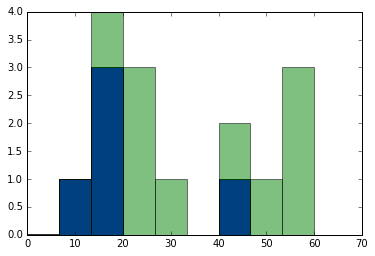

In [19]:
tempos_A = list(dataframe_resumo[dataframe_resumo.versao=="A"].delta_t)
tempos_B = list(dataframe_resumo[dataframe_resumo.versao=="B"].delta_t)
tempos_A1=[]
tempos_B1=[]

for i in tempos_A:
    if i<100:
        tempos_A1.append(i)
for i in tempos_B:
    if i<100:
        tempos_B1.append(i)
faixa = np.linspace(0,60,10)

plt.hist(tempos_A1, bins=faixa)
plt.hist(tempos_B1, bins=faixa, alpha=0.5)

In [20]:
print("A média de tempos da interface A é de: {0}".format(np.mean(tempos_A1)))

print("A média de tempos da interface B é de: {0}".format(np.mean(tempos_B1)))

print("A variância dos tempos da interface A é de: {0}".format(np.var(tempos_A1)))

print("A variância dos tempos da interface B é de: {0}".format(np.var(tempos_B1)))

print("O desvio padrão dos tempos da interface A é de: {0}".format(math.sqrt(np.var(tempos_A1))))

print("O desvio padrão dos tempos da interface B é de: {0}".format(math.sqrt(np.var(tempos_B1))))

A média de tempos da interface A é de: 21.2542
A média de tempos da interface B é de: 32.132266666666666
A variância dos tempos da interface A é de: 138.53759976
A variância dos tempos da interface B é de: 296.3542267288889
O desvio padrão dos tempos da interface A é de: 11.770199648264256
O desvio padrão dos tempos da interface B é de: 17.21494196124079


Aqui nós temos uma visão dos principais valores obtidos através do nosso banco de dados, os quais serão utilizados em fórmulas explicadas nas páginas 324 e 325 do livro "Noções de Probabilidade e Estatística" de Magalhães Lima. Foi considerado este caso em específico para ser utilizado pois trata-se de um caso onde o valores são idependentes entre si, (tempo no site A/tempo no site B)  e possuem variâncias (e, logo, desvios padrões) diferentes e desconhecidos.



### 4.Teste de hipótese

Teste de hipóteses: Hipótese H0: muA <= muB (média da A será menor ou igual à média B).
ou H1: muA > muB (média da A será maior que a média B) 
Realizaremos o teste com um nível de confiança de 95%.

Em outras palavras, nosso teste se comprometerá em testar a hipótese de que a média de tempo para uma determinada ação ser realizada no site A seja menor ou igual que a média de tempo para a mesma ação no site B, ou seja, será um teste bicaudal, onde RC se apresenta no lado direito da distribuição.

Através do teorema do valor médio temos que nossa distribuição amostral irá se aproximar à uma distribuição normal, e assumindo um valor desconhecido de variância da população, uma distribuição normal para a população e tendo o valor da variância amostral é possível utilizar as fórmulas contidas no livros.

Assim, considerando muD igual a zero no caso da nossa hipótese nula, pois muA-muB=0, podemos utilizar a fórmula encontrando na página 324:

In [ ]:
alpha= 0.05
na= 5
nb = 16
μD = 0 
    
μa= np.mean(tempos_A1)
μb= np.mean(tempos_B1)
sa= math.sqrt(np.var(tempos_A1))
sb = math.sqrt(np.var(tempos_B1))
s1a = ((sa**2)/na)
s1b = ((sb**2)/nb)
s2a = (s1a**2)/(na-1)
s2b = (s1b**2)/(nb-1)

In [25]:

T=(μD -(μa - μb))/((s1a+s1b)**(0.5))#fórmula pg324
v= ((s1a + s1b)**2)/(s2a+s2b)##fórmula pg324
T, v


(1.5998945924053378, 9.94972780763389)

In [30]:
pvalue = stats.t.sf(T,df=v)
pvalue

alpha=0.05
if(pvalue> 1-alpha):
    print("O teste rejeita a hipótese inicial")
else:
    print("O teste não rejeita a hipótese inicial")


O teste não rejeita a hipótese inicial


Através do nosso valor-p e considerando um índice de significância de 5% o teste não rejeita a hipótese inicial, assim, o site tipo A é aquele que possui uma média de tempo menor ou igual ao site B, para realizar uma mesma ação, e por consequência é o método mais eficiente e que deve ser utilizado em iterações futuras do site.